In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

import numpy as np
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator

In [237]:
data_path = "./results/*.csv"  
fig_path = "qsar-tid-11-comp.pdf"
metric = "rmse"      

base_color = "#a6d8af"        
manual_color = "#f4a6a6"     
base_e_color = "#3e7949"     
manual_e_color = "#c96a6a"     


In [238]:
# load csv files and merge the results
all_files = glob.glob(data_path)
dfs = []

for file in all_files:
    df = pd.read_csv(file)
    method_name = df["method"].iloc[0]  # Assumes one method per file
    df["method"] = method_name
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
agg_df = combined_df.groupby("method")[metric].agg(["mean", "std"]).reset_index() # calc mean and std

In [239]:
# names to display
method_name_map = {
    "original": "TabPFN",
    "random_fs": "TabPFN+randFS",
    "variance_fs": "TabPFN+varFS",
    "tree_fs": "TabPFN+treeFS",
    "pca_dr": "TabPFN+pca",
    "random_dr": "TabPFN+randproj",
    "agglo_dr": "TabPFN+agglo"
}


In [240]:
# Replace method names for display
agg_df["method_display"] = agg_df["method"].map(method_name_map)


In [241]:
# TabArena entries
manual_df = pd.DataFrame({
    "method": ["RealMLP", "TabM", "MNCA"],
    "method_display": ["RealMLP", "TabM", "MNCA"],
    "mean": [0.763, 0.761, 0.770],
    "std": [0.047, 0.050, 0.044]
})
manual_methods = set(manual_df["method"].tolist()) 

In [242]:
final_df = pd.concat([agg_df, manual_df], ignore_index=True)
final_df_sorted = final_df.sort_values(by="mean")


In [243]:

# Create color list for each bar
bar_colors = [
    manual_color if method in manual_methods else base_color
    for method in final_df_sorted["method"]
]

# Create color list for each bar
e_colors = [
    manual_e_color if method in manual_methods else base_e_color
    for method in final_df_sorted["method"]
]

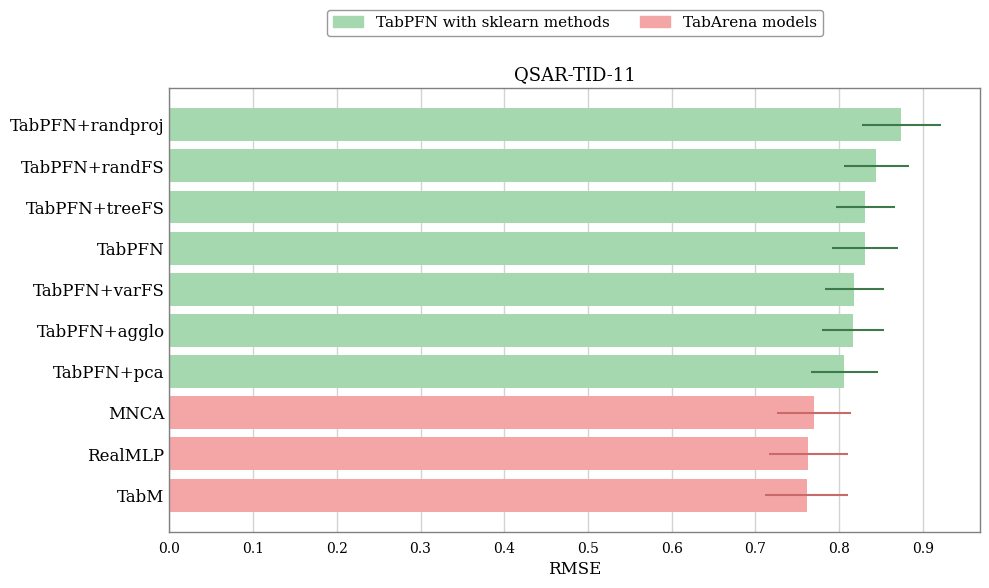

In [244]:
# === Setup ===
y_pos = np.arange(len(final_df_sorted))

fig, ax = plt.subplots(figsize=(10, 6))

# === Main Bar Plot ===
ax.barh(
    y=y_pos,
    width=final_df_sorted["mean"],
    xerr=final_df_sorted["std"],
    color=bar_colors,
    capsize=0,
    ecolor=e_colors,
)

# === Grid & Axis Styling ===
ax.grid(True, axis='x', linestyle='-', color='lightgray', linewidth=1)
ax.set_axisbelow(True)

# Axis ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(final_df_sorted["method_display"], fontsize=12)
ax.set_xlabel("RMSE", fontsize=12)
ax.set_title("QSAR-TID-11", fontsize=13)

# Remove y-axis tick marks
ax.tick_params(axis='y', length=0)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_tick_params(width=0)

# === Axis Spine Styling ===
for spine in ax.spines.values():
    spine.set_color('gray')
    spine.set_linewidth(1)

# === Legend Above Plot ===
legend_handles = [
    mpatches.Patch(color=base_color, label="TabPFN with sklearn methods"),
    mpatches.Patch(color=manual_color, label="TabArena models")
]

legend = ax.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=2,
    frameon=True,
    fontsize=11
)

legend.get_frame().set_edgecolor('gray')
# legend.get_frame().set_facecolor('lightgray')  # Optional if you want a filled box

# === Final Layout ===
plt.tight_layout()
plt.show()

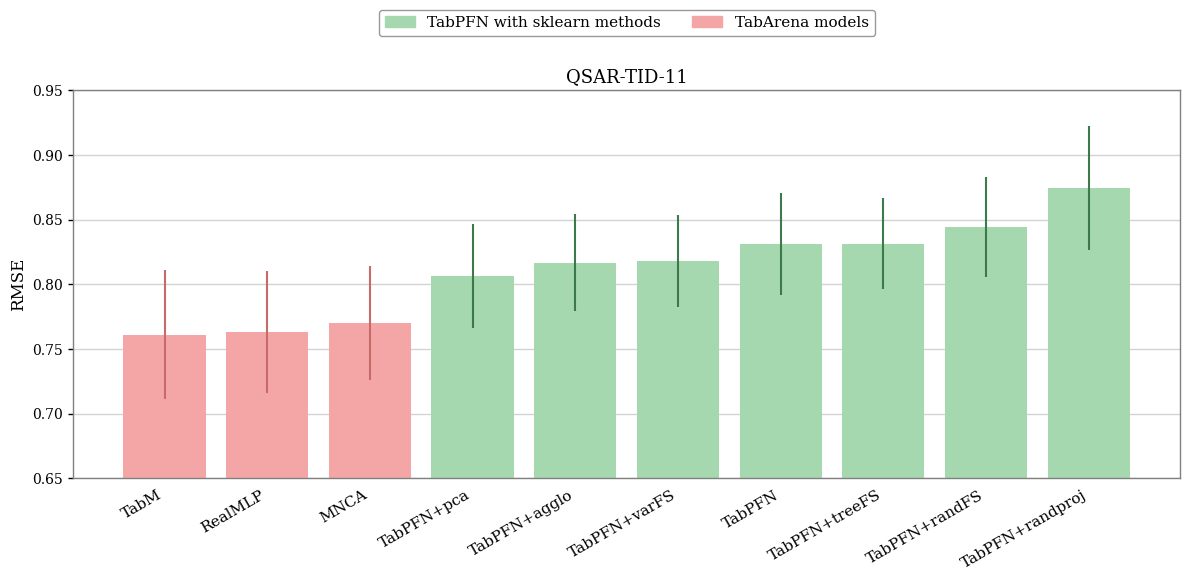

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator

# === Setup ===
x_pos = np.arange(len(final_df_sorted))

fig, ax = plt.subplots(figsize=(12, 6))  # Wider plot for label space

# === Main Bar Plot ===
ax.bar(
    x=x_pos,
    height=final_df_sorted["mean"],
    yerr=final_df_sorted["std"],
    color=bar_colors,
    capsize=0,
    ecolor=e_colors,
    linewidth=2
)

# === Grid & Axis Styling ===
ax.grid(True, axis='y', linestyle='-', color='lightgray', linewidth=1)
ax.set_axisbelow(True)

# Axis ticks and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(final_df_sorted["method_display"], fontsize=11, rotation=30, ha="right")
ax.set_ylabel("RMSE", fontsize=12)
ax.set_title("QSAR-TID-11", fontsize=13)

# Optional: Restrict x-axis range for better focus
ax.set_ylim(0.65, 0.95)

# Ticks
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=1)

# === Axis Spine Styling ===
for spine in ax.spines.values():
    spine.set_color('gray')
    spine.set_linewidth(1)

# === Legend Above Plot ===
legend_handles = [
    mpatches.Patch(color=base_color, label="TabPFN with sklearn methods"),
    mpatches.Patch(color=manual_color, label="TabArena models")
]

legend = ax.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=2,
    frameon=True,
    fontsize=11
)

legend.get_frame().set_edgecolor('gray')

# === Final Layout ===
plt.tight_layout()
plt.savefig(fig_path)
plt.show()
